### Analyze our shopping decisions

The program analyzes the transactions recorded in the SQLite database with python.

Recording transactions can help us understand our own financial status. And then, based on the account book, we can make better decisions.

Here is an example of fake transaction records

In [1]:
# import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os

In [2]:
def get_dataframe(sql_syntax: str) -> pd.core.frame.DataFrame:
    connection = sqlite3.connect('demo.db')
    df = pd.read_sql(sql_syntax + ";", connection)
    connection.close()
    return df

In [3]:
# Skip the payment of the credit card, and select Time (year and month), payee, and amount only
credit_card_payment = \
f"""
SELECT STRFTIME('%Y-%m', date) AS Time,
       payee,
       amount * (-1) AS amount_pay
  FROM demo_table
 WHERE amount_pay > 0
 ORDER BY Time
"""

In [4]:
# Group by time
monthly_cost = \
f"""
SELECT Time,
       SUM(amount_pay) AS Sum
  FROM ({credit_card_payment})
 GROUP BY Time
"""

In [5]:
# Analyze the specific month
selected_time = '2025-04'

# The user can customize the categories
# The following is an example
selected_month_payment = \
f"""
SELECT CASE WHEN payee LIKE 'AMZN%' OR 'Amazon%' OR 'AMAZON%' THEN 'Online shopping'
            WHEN payee LIKE 'CHEVRON%' OR 'ARCO%' THEN 'Traffic'
            WHEN payee LIKE '%REGISTRATION%' THEN 'Education'
            WHEN payee LIKE '99 RANCH%' OR 'H MART%' OR 'ALBERTSONS%' OR 'TRADER JOE%' OR 'MITSUWA' OR 'RALPHS%' OR 'COSTCO%' OR 'ZION%' THEN 'Market'
            WHEN payee LIKE 'IKEA%' OR 'DAISO%' OR 'HOME%' OR '%HOME%' OR 'TJ MAX%' OR 'BED%' OR 'TARGET%' OR 'BEST BUY %' THEN 'Home'
            WHEN payee LIKE 'CVS%' OR 'MED%' THEN 'Medical'
            WHEN payee LIKE 'Uniqlo%' OR 'HOLLISTER%' OR 'NIKE%' OR 'H&M%' THEN 'Clothes'
            WHEN payee LIKE 'Nintendo%' OR 'Microsoft%' OR 'MICROSOFT%' OR 'APPLE%' OR 'REI%' OR '%SPORT%' THEN 'Play'
            WHEN payee LIKE '%TEA%' OR '%COFFEE%' OR '%Coffee%' OR '%BOBA%' THEN 'Drink'
            WHEN payee LIKE 'USPS%' THEN 'Mail'
            WHEN payee LIKE 'UBER EATS%' OR 'DOORDASH%' THEN 'Food delivery'
            ELSE 'Other' END AS 'Category',
       amount_pay
  FROM ({credit_card_payment}) 
 WHERE Time = '{selected_time}'
"""

In [6]:
# Group by category we just created
summary_of_selected_month_payment = \
f"""
SELECT Category,
       SUM(amount_pay) AS 'Sum'
  FROM ({selected_month_payment})
 GROUP BY Category
"""

In [7]:
get_dataframe(credit_card_payment)

,Time,payee,amount_pay
0,2025-03,Microsoft*Xbox Live Gold 425-6816830 WA,9.99
1,2025-04,APPLE.COM/BILL 866-712-7753 CA,9.99
2,2025-04,TARGET 00012385 IRVINE CA,43.58
3,2025-04,HOMEGOODS # 0728 IRVINE CA,64.64
4,2025-04,TRADER JOE'S #210 QPS IRVINE CA,38.23
5,2025-04,Uniqlo USA LLC New York NY,118.31
6,2025-04,Nintendo CD782790275 800-2553700 WA,7.99
7,2025-04,MITSUWA MRKTPLACE IR IRVINE CA,22.08


In [8]:
get_dataframe(monthly_cost)

,Time,Sum
0,2025-03,9.99
1,2025-04,304.82


In [9]:
get_dataframe(selected_month_payment)

,Category,amount_pay
0,Other,9.99
1,Other,43.58
2,Other,64.64
3,Other,38.23
4,Clothes,118.31
5,Play,7.99
6,Other,22.08


  Category     Sum
0  Clothes  118.31
1    Other  178.52
2     Play    7.99 



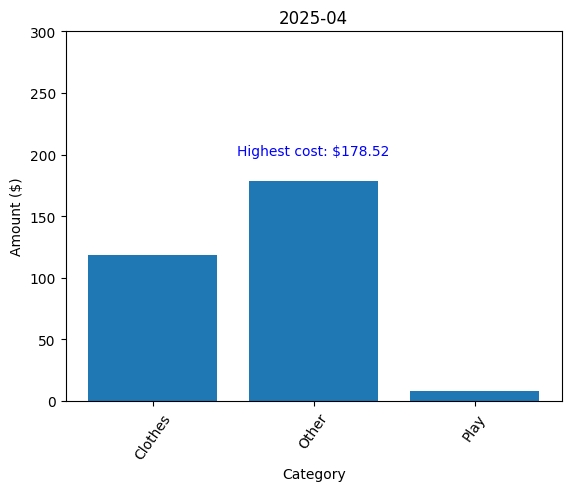

In [10]:
# Visualize the result as an example.
df = get_dataframe(summary_of_selected_month_payment)
print(df, "\n")

category = df["Category"].values
amount = df["Sum"].values
x = np.arange(len(category))

fig, ax = plt.subplots()
ax.bar(category, amount)
ax.set_title(selected_time)
ax.set_xlabel("Category")
ax.set_ylabel("Amount ($)")
ax.set_ylim(0, 300)
ax.text('Other', 200, f"Highest cost: ${amount.max():.2f}", horizontalalignment = 'center', color = 'blue')
ax.tick_params(axis = 'x', rotation = 55)

plt.show()

### Incrediable Matplotlib

Matplotlib can create so many different visualizations that you need; moreover, they can be useful for custom visualizations. Just visit their website and try it!

https://matplotlib.org/stable/index.html